In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from scipy.cluster.hierarchy import dendrogram, linkage
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import fcluster
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from scipy.stats import mode
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.express as px

## Méthode du benchmark

## Solutions proposées

### Lecture des données

Tous les retraitements des données sont réalisés dans les modules `DataPreparer` et `DataScaler`.

In [2]:
from PrepareData import DataPreparer
path_to_data = r"C:\Users\meghn\Documents\Dauphine\Master\M2 Finance Quantitative\Semestre 2\Machine Learning\data\\"
data_preparer = DataPreparer(path = path_to_data, save_to_excel=False, mode="train")
data_preparer.prepare_data()
data_preparer.save_data()

Saving the prepared data to data/prepared_data_train.parquet and data/prepared_data_train.xlsx
Data prepared and saved!


In [3]:
from GetData import DataScaler
data_scaler = DataScaler(train=True)
data, feature_columns, target_column = data_scaler.get_data()
# get data
feature_columns =[ 'HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'HOME_PLAYERS_PLAYER_DRIBBLED_PAST_season_sum_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_sum_SUM', 'HOME_PLAYERS_PLAYER_PENALTIES_SAVED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_REDCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_BLOCKED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_YELLOWCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_CROSSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_ASSISTS_season_average_SUM', 'HOME_PLAYERS_PLAYER_DUELS_LOST_season_average_SUM', 'HOME_PLAYERS_PLAYER_PASSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_TOTAL_season_average_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_season_std_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_std_SUM', 'HOME_PLAYERS_PLAYER_KEY_PASSES_season_std_SUM', 'AWAY_PLAYERS_PLAYER_BIG_CHANCES_MISSED_season_average_SUM', 'AWAY_PLAYERS_PLAYER_SHOTS_ON_TARGET_season_average_SUM']

Removed 13.08% of columns because they have more than 20% of values missing
Removed 16.34% of columns because they have only one value
Removed 44.42% of rows because they have missing values


Checking for class imbalance

In [4]:
for cat in data["results"].unique():
    print(cat, len(data[data["results"] == cat]))

2 2100
1 1761
0 2977


### Séparation de nos ensembles d'entraînement

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[feature_columns])

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
	data[target_column], 
	test_size=0.2, 
	random_state=42,
	stratify=data[target_column],
	shuffle=True
	)

Nous pouvons constater que nous avons une accuracy de 0.48, supérieure à celle du benchmark de 0.4656. Cette méthode est donc prometteuse !

### 1. Modèle non supervisé - différenciation des clusters

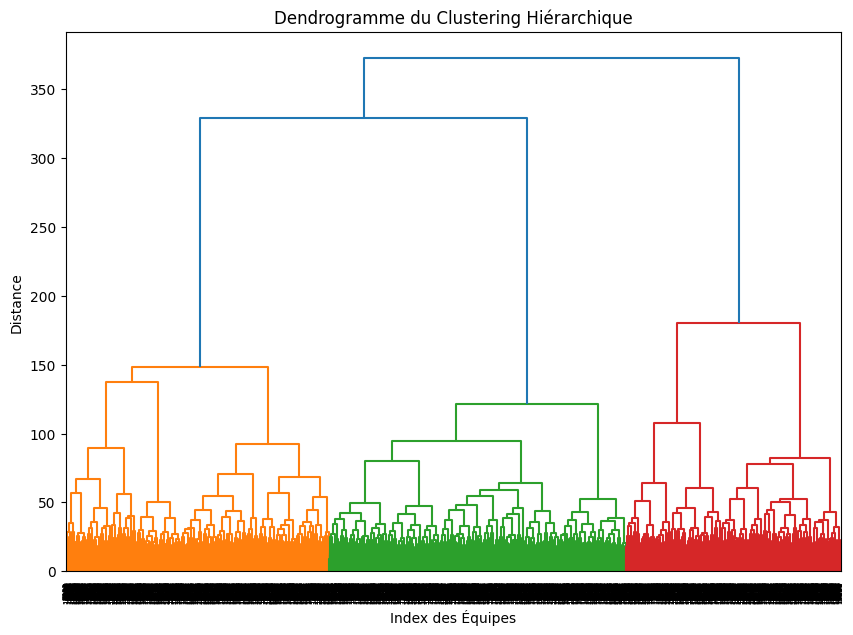

In [6]:
linked = linkage(X_scaled, method='ward')  
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=data[feature_columns].index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogramme du Clustering Hiérarchique')
plt.xlabel('Index des Équipes')
plt.ylabel('Distance')
plt.show()

In [7]:
best_threshold = 0
best_silhouette = -1
for threshold in range(100, 351, 50):
    labels = fcluster(linked, t=threshold, criterion='distance')
    num_clusters = len(set(labels))
    if num_clusters > 1:
        silhouette_avg = silhouette_score(X_scaled, labels)
        print(f"Pour une hauteur de coupe de {threshold}, l'indice de silhouette est : {silhouette_avg:.10f}")
    else:
        print(f"Pour une hauteur de coupe de {threshold}, nombre de clusters générés est {num_clusters}. Indice de silhouette non calculé.")
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_threshold = threshold

print(f"Meilleur seuil de coupe: {best_threshold} avec un indice de silhouette de {best_silhouette:.10f}")

Pour une hauteur de coupe de 100, l'indice de silhouette est : 0.0102746825
Pour une hauteur de coupe de 150, l'indice de silhouette est : 0.0497239324
Pour une hauteur de coupe de 200, l'indice de silhouette est : 0.0707560362
Pour une hauteur de coupe de 250, l'indice de silhouette est : 0.0707560362
Pour une hauteur de coupe de 300, l'indice de silhouette est : 0.0707560362
Pour une hauteur de coupe de 350, l'indice de silhouette est : 0.0922291112
Meilleur seuil de coupe: 350 avec un indice de silhouette de 0.0922291112


Appliquons désormais le modèle de KMeans.

In [10]:
pipeline = Pipeline([
    ('kmeans', KMeans(random_state=42))
])

param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 20, 30]
}

def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(X_scaled)

print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleurs Score de Silhouette : {grid_search.best_score_:.4f}")

# Clustering avec les meilleurs paramètres
best_kmeans = grid_search.best_estimator_.named_steps['kmeans']
data['cluster'] = best_kmeans.fit_predict(X_scaled)

Meilleurs paramètres: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Meilleurs Score de Silhouette : 0.1156


C:\Users\meghn\AppData\Local\Temp\ipykernel_24252\145209386.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['cluster'] = best_kmeans.fit_predict(X_scaled)


Calculons désormais le score d'accuracy.

In [11]:
clusters = data['cluster']
labels = data['results']
cluster_labels = np.zeros_like(clusters)
for cluster in np.unique(clusters):
    mask = (clusters == cluster)
    cluster_labels[mask] = mode(labels[mask])[0]
data['cluster_labels'] = cluster_labels

# Calculer l'accuracy
accuracy = accuracy_score(labels, cluster_labels)
print(f"Clustering Accuracy: {accuracy:.4f}")

Clustering Accuracy: 0.4354


C:\Users\meghn\AppData\Local\Temp\ipykernel_24252\3517452048.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['cluster_labels'] = cluster_labels


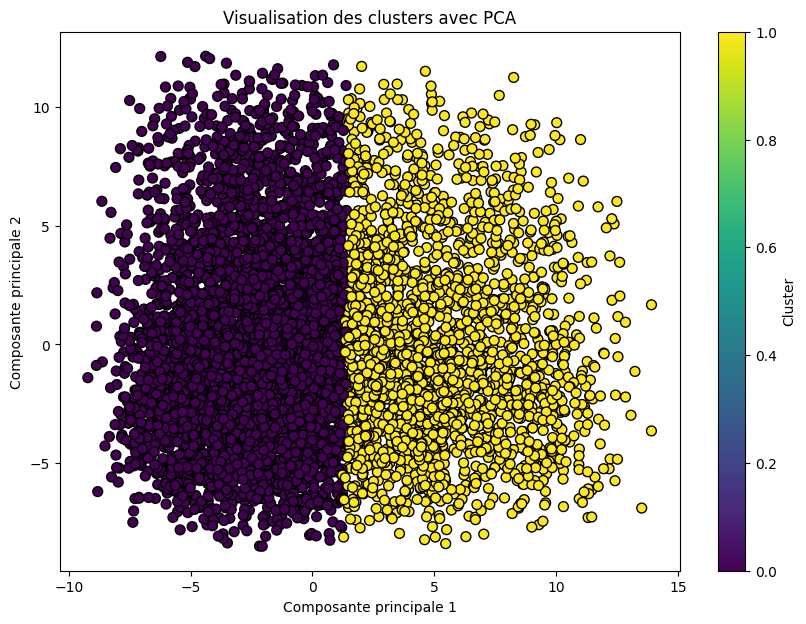

In [14]:
from sklearn.decomposition import PCA

X = data[feature_columns]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualiser les clusters en 2D
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Visualisation des clusters avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Supposons que tu as une colonne 'target' pour la classification supervisée
y = data['results']  # Remplace 'target' par le nom de ta colonne cible

# Modèle de référence supervisé
rf = RandomForestClassifier(random_state=42)

# Scores de validation croisée
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Accuracy: {scores.mean():.4f}")

# Comparaison avec le meilleur score de silhouette du modèle de clustering
print(f"KMeans Best Silhouette Score: {best_silhouette:.10f}")


Random Forest Accuracy: 0.4912
KMeans Best Silhouette Score: 0.0922291112


In [67]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline pour standardiser les données puis appliquer KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Définir les paramètres de la grille
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 20, 30]
}

# Fonction de scoring personnalisée pour l'indice de silhouette
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Appliquer GridSearchCV avec la fonction de scoring personnalisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(X)

# Afficher les meilleurs paramètres et le meilleur score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Silhouette Score: {grid_search.best_score_:.4f}")

# Clustering avec les meilleurs paramètres
best_kmeans = grid_search.best_estimator_.named_steps['kmeans']
data['cluster'] = best_kmeans.fit_predict(X)


Best Parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 30}
Best Silhouette Score: 0.1157


Ce modèle a donc une performance supérieure à celle du benchmark (accuracy). En effet, avec un meilleur score d'accuracy sur l'ensemble de test (51%), cela est supérieur à la méthode du bench (0.46).

### 2. Modèle de régression logistique

Testons un modèle simple de régression logistique.

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.48903508771929827
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.71      0.61       605
           1       0.22      0.07      0.10       338
           2       0.47      0.51      0.49       425

    accuracy                           0.49      1368
   macro avg       0.41      0.43      0.40      1368
weighted avg       0.44      0.49      0.45      1368



C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = LogisticRegression(solver='liblinear')  

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']        
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print("Accuracy sur l'ensemble de test :", accuracy_score(y_test, predictions))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres :  {'C': 0.01, 'penalty': 'l1'}
Meilleur score :  0.4952468007312614
Accuracy sur l'ensemble de test : 0.5131578947368421


Ce modèle simple a une accuracy très prommetteuse malgré sa méthode simple !

### 2. Modèle supervisé : Random Forest Classfier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# pour le grid search CV
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30],        
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}
rf_model.fit(X_train)


In [46]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# errors outputs the MSE of the Gradient Boosting for each tree's iteration t=1,...,120
errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]

In [47]:
min_error = np.min(errors)
bst_n_estimators = np.argmin(errors) + 1


In [48]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=85, random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleur score de validation croisée :", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs paramètres trouvés : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Meilleur score de validation croisée : 0.5


In [50]:
best_rf_model = grid_search.best_estimator_
test_predictions = best_rf_model.predict(X_test)
print("Accuracy sur l'ensemble de test :", accuracy_score(y_test, test_predictions))
print("Rapport de classification :\n", classification_report(y_test, test_predictions))


Accuracy sur l'ensemble de test : 0.5175438596491229
Rapport de classification :
               precision    recall  f1-score   support

           0       0.52      0.83      0.64       605
           1       0.36      0.01      0.03       338
           2       0.51      0.48      0.49       425

    accuracy                           0.52      1368
   macro avg       0.46      0.44      0.39      1368
weighted avg       0.48      0.52      0.44      1368



Nous pouvons constater que le score d'accuracy s'améliore avec cette méthode.

### 2. Modèle supervisé : Random Forest Classfier

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class DrawWinLossClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifier_draw, classifier_win_loss):
        self.classifier_draw = classifier_draw
        self.classifier_win_loss = classifier_win_loss

    def fit(self, X, y):
        y_draw = (y == 0).astype(int)
        self.classifier_draw.fit(X, y_draw)

        non_draw_indices = (y != 1)
        X_non_draw = X[non_draw_indices]
        y_win_loss = y[non_draw_indices]

        if X_non_draw.shape[0] > 0:
            self.classifier_win_loss.fit(X_non_draw, y_win_loss)
        
        return self
    
    def predict(self, X):
        draw_predictions = self.classifier_draw.predict(X)
        final_predictions = np.full(X.shape[0], -99)  # Initialize with a default value that's clearly wrong

        # Predict non-draws
        non_draw_indices = draw_predictions == 0
        if np.any(non_draw_indices):
            win_loss_predictions = self.classifier_win_loss.predict(X[non_draw_indices])
            final_predictions[non_draw_indices] = win_loss_predictions

        # Assign draw predictions
        final_predictions[draw_predictions == 1] = 0  # Assuming '0' is the code for 'draw'

        return final_predictions


In [52]:
custom_classifier = DrawWinLossClassifier(
    classifier_draw=RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced'),
    classifier_win_loss=RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
)

custom_classifier.fit(X_train, y_train)

predictions = custom_classifier.predict(X_test)

# Evaluate the results
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.5109649122807017
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       605
           1       0.00      0.00      0.00       338
           2       0.49      0.52      0.50       425

    accuracy                           0.51      1368
   macro avg       0.34      0.44      0.38      1368
weighted avg       0.38      0.51      0.43      1368



C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

Amélioration marginale du score

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    passthrough=True
)

# Fit the model on the training data
stack_model.fit(X_train, y_train)

# Evaluate the model
stack_predictions = stack_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stack_predictions))
print("Classification Report:\n", classification_report(y_test, stack_predictions))


C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Model Accuracy: 0.4817251461988304
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.71      0.60       605
           1       0.19      0.06      0.09       338
           2       0.47      0.50      0.48       425

    accuracy                           0.48      1368
   macro avg       0.40      0.42      0.39      1368
weighted avg       0.43      0.48      0.44      1368



### 4. Réseau de neurones, Keras Classifier

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Adding L2 regularization
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.1, callbacks=[early_stopping])
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predicted_classes))
print(confusion_matrix(y_test, predicted_classes))


Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4356 - loss: 2.4063 - val_accuracy: 0.4936 - val_loss: 1.8386
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 1.7358 - val_accuracy: 0.4973 - val_loss: 1.4610
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 1.3799 - val_accuracy: 0.4808 - val_loss: 1.2497
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 1.2022 - val_accuracy: 0.4808 - val_loss: 1.1518
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5211 - loss: 1.1131 - val_accuracy: 0.4973 - val_loss: 1.0912
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5279 - loss: 1.0572 - val_accuracy: 0.5027 - val_loss: 1.0627
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 1.0312 - val_accuracy: 0.4918 - val_loss: 1.0573
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5263 - loss: 1.0244 - val_accuracy: 0.

Accuracy qui stagne.

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

# Define the neural network model
def create_model(layer1, layer2, dropout_rate, l2_strength):  # Adjust l2_strength as needed
    model = Sequential()
    model.add(Dense(
        layer1, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength), 
        input_dim=len(feature_columns)
        ))
    model.add(Dense(
        layer2, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength)
        ))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(3, activation='softmax')) 
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Set hyperparameters
layer1 = 160
layer2 = 896
dropout_rate = 0.15
l2_strength = 0.001607168503200792

# Create the model
model = create_model(
    layer1=layer1,
    layer2=layer2,
    dropout_rate=dropout_rate,
    l2_strength=l2_strength
)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping]
    )
    
    
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')


Epoch 1/100


C:\Users\meghn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 - 2s - 14ms/step - accuracy: 0.3848 - loss: 1.7615 - val_accuracy: 0.4218 - val_loss: 1.7262
Epoch 2/100
171/171 - 1s - 3ms/step - accuracy: 0.4470 - loss: 1.7155 - val_accuracy: 0.4642 - val_loss: 1.6974
Epoch 3/100
171/171 - 1s - 3ms/step - accuracy: 0.4618 - loss: 1.6949 - val_accuracy: 0.4839 - val_loss: 1.6830
Epoch 4/100
171/171 - 1s - 4ms/step - accuracy: 0.4795 - loss: 1.6791 - val_accuracy: 0.4890 - val_loss: 1.6736
Epoch 5/100
171/171 - 1s - 3ms/step - accuracy: 0.4865 - loss: 1.6713 - val_accuracy: 0.4876 - val_loss: 1.6670
Epoch 6/100
171/171 - 1s - 4ms/step - accuracy: 0.4850 - loss: 1.6614 - val_accuracy: 0.4949 - val_loss: 1.6610
Epoch 7/100
171/171 - 1s - 3ms/step - accuracy: 0.4949 - loss: 1.6531 - val_accuracy: 0.5015 - val_loss: 1.6558
Epoch 8/100
171/171 - 1s - 3ms/step - accuracy: 0.4936 - loss: 1.6465 - val_accuracy: 0.5037 - val_loss: 1.6514
Epoch 9/100
171/171 - 1s - 3ms/step - accuracy: 0.5048 - loss: 1.6394 - val_accuracy: 0.5058 - val_loss: 1.6476
Epo